# Monte Carlo simulation

This notebook demonstrates a simple Monte Carlo simulation

In [17]:
import numpy as np
import Tkinter, tkFileDialog
import pandas as pd
import matplotlib.pyplot as plot
import sys

The following function simulates Guassian distribution of percentage changes and return cumulative percentage change

In [18]:
def change_ndays(n,avg,sd):
    """Compute percentage change for n number of days"""
    changes = np.random.normal(avg,sd,n)+1
    return np.prod(changes)

The input is a csv file. Let's use pandas to create a dataframe from the input

In [19]:
try:
    Tkinter.Tk().withdraw()
    file=tkFileDialog.askopenfile(initialfile='apple.2011.csv',title='Select File',filetypes=[('all','*'), ('csv','*.csv')])
    df=pd.read_csv(file,warn_bad_lines=True,names=['date','price','change'],skiprows=2)
except Exception, e:
    print "Error: Terminating the program! " + str(e)
    sys.exit(e)

We need mean and standard deviation for Guassian distribution

In [20]:
avg=df.change.mean()
sd=df.change.std()
print "The mean price is %s and standard deviation is %s" % (avg,sd)

The mean price is 0.000957355207171 and standard deviation is 0.0165205562984


Let's take last price we have and try to comput VaR

In [21]:
last_price=df.tail(1).iloc[0,1]
print "Last price from which VaR needs to be calculate is %s" % last_price

Last price from which VaR needs to be calculate is 405.0


Let's simulate price changes 10000 times

In [22]:
prices=np.array([change_ndays(20,avg,sd)*last_price for i in range(0,10000)],dtype=float)

Lets draw histogram of the simulated prices

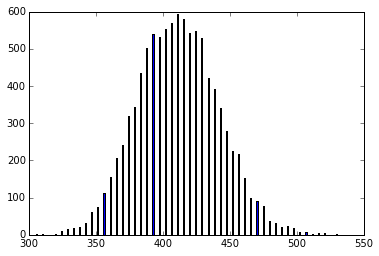

In [23]:
%matplotlib inline
histogram,bins=np.histogram(prices,bins=50)
plot.bar(bins[:-1],histogram)
plot.show()

Finally we compute VaR at 99% confidence

In [24]:
print "VaR at 99%% confidence:%s" % (np.percentile(np.sort(prices),1))

VaR at 99% confidence:345.982286213
